# 주제 : 신용카드 고객 데이터 분석

[ 목차 ]
1. 데이터 탐색
    - 데이터 확인
    - 분석할 컬럼 선정

2. 데이터 전처리
    - 중복값 처리
    - 결측치 처리
    - 이상치 처리
    - 데이터 스케일링

3. 데이터 분석
    - 주성분 분석
    - 클러스터 분석

4. 결론

---
---

## 1. 데이터 탐색

### 데이터 확인

- 기본 설정

In [1]:
# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 필요한 라이브러리 호출
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### 데이터 설명

- 데이터 출처: [Kaggle](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data) `Credit Card Dataset`

- 데이터 명세

| No. | 표준항목명             | 영문명                     | 설명                                                                           | 표현형식/단위  | 예시          |
|-----|------------------|---------------------|-----------------------------------------------------------------------------|-------------|-------------|
| 1   | 고객 ID             | CUST_ID               | 고객을 식별하기 위한 고유 ID                                                           | -           | C10001      |
| 2   | 잔액                | BALANCE               | 신용카드 계좌의 현재 잔액                                                               | N           | 40.9        |
| 3   | 잔액 업데이트 빈도     | BALANCE_FREQUENCY     | 잔액이 업데이트 되는 빈도                                                             | N           | 0.818       |
| 4   | 총 구매액            | PURCHASES             | 신용카드로 이루어진 총 구매액                                                          | N           | 95.4        |
| 5   | 일회성 구매액         | ONEOFF_PURCHASES      | 일회성으로 이루어진 구매액                                                             | N           | 0.0         |
| 6   | 할부 구매액           | INSTALLMENTS_PURCHASES | 할부로 이루어진 구매액                                                               | N           | 95.4        |
| 7   | 현금 서비스 금액       | CASH_ADVANCE          | 현금 서비스로 인출한 금액                                                              | N           | 0.0         |
| 8   | 구매 빈도             | PURCHASES_FREQUENCY    | 구매가 이루어진 빈도                                                                 | N           | 0.167       |
| 9   | 일회성 구매 빈도       | ONEOFF_PURCHASES_FREQUENCY | 일회성 구매가 이루어진 빈도                                                           | N           | 0.0         |
| 10  | 할부 구매 빈도         | PURCHASES_INSTALLMENTS_FREQUENCY | 할부 구매가 이루어진 빈도                                                         | N           | 0.083       |
| 11  | 현금 서비스 빈도       | CASH_ADVANCE_FREQUENCY  | 현금 서비스가 이루어진 빈도                                                           | N           | 0.0         |
| 12  | 현금 서비스 거래 횟수   | CASH_ADVANCE_TRX       | 현금 서비스 거래의 횟수                                                             | N           | 0           |
| 13  | 구매 횟수             | PURCHASES_TRX         | 총 구매 거래의 횟수                                                                | N           | 2           |
| 14  | 신용 한도             | CREDIT_LIMIT          | 신용카드의 신용 한도                                                                | N           | 1000.0      |
| 15  | 지불액               | PAYMENTS              | 신용카드 계좌에 지불한 총 금액                                                        | N           | 201.8       |
| 16  | 최소 지불액           | MINIMUM_PAYMENTS      | 신용카드 계좌의 최소 지불액                                                           | N           | 139.5       |
| 17  | 전액 지불 비율        | PRC_FULL_PAYMENT      | 신용카드 결제 금액 중 전액을 지불한 비율                                                  | N           | 0.0         |
| 18  | 카드 소지 기간         | TENURE                | 신용카드 계좌를 소지한 기간 (월)                                                       | N           | 12          |



#### 데이터 프레임 생성

In [3]:
data = pd.read_csv("credit_card.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### 데이터 정보 확인(info, 기술통계)

In [4]:
# 행, 열 개수 확인
data.shape

(8950, 18)

In [5]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# 기술 통계량 확인
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### 데이터 분포 확인
- 숫자형 변수를 선별하여 데이터 분포 확인

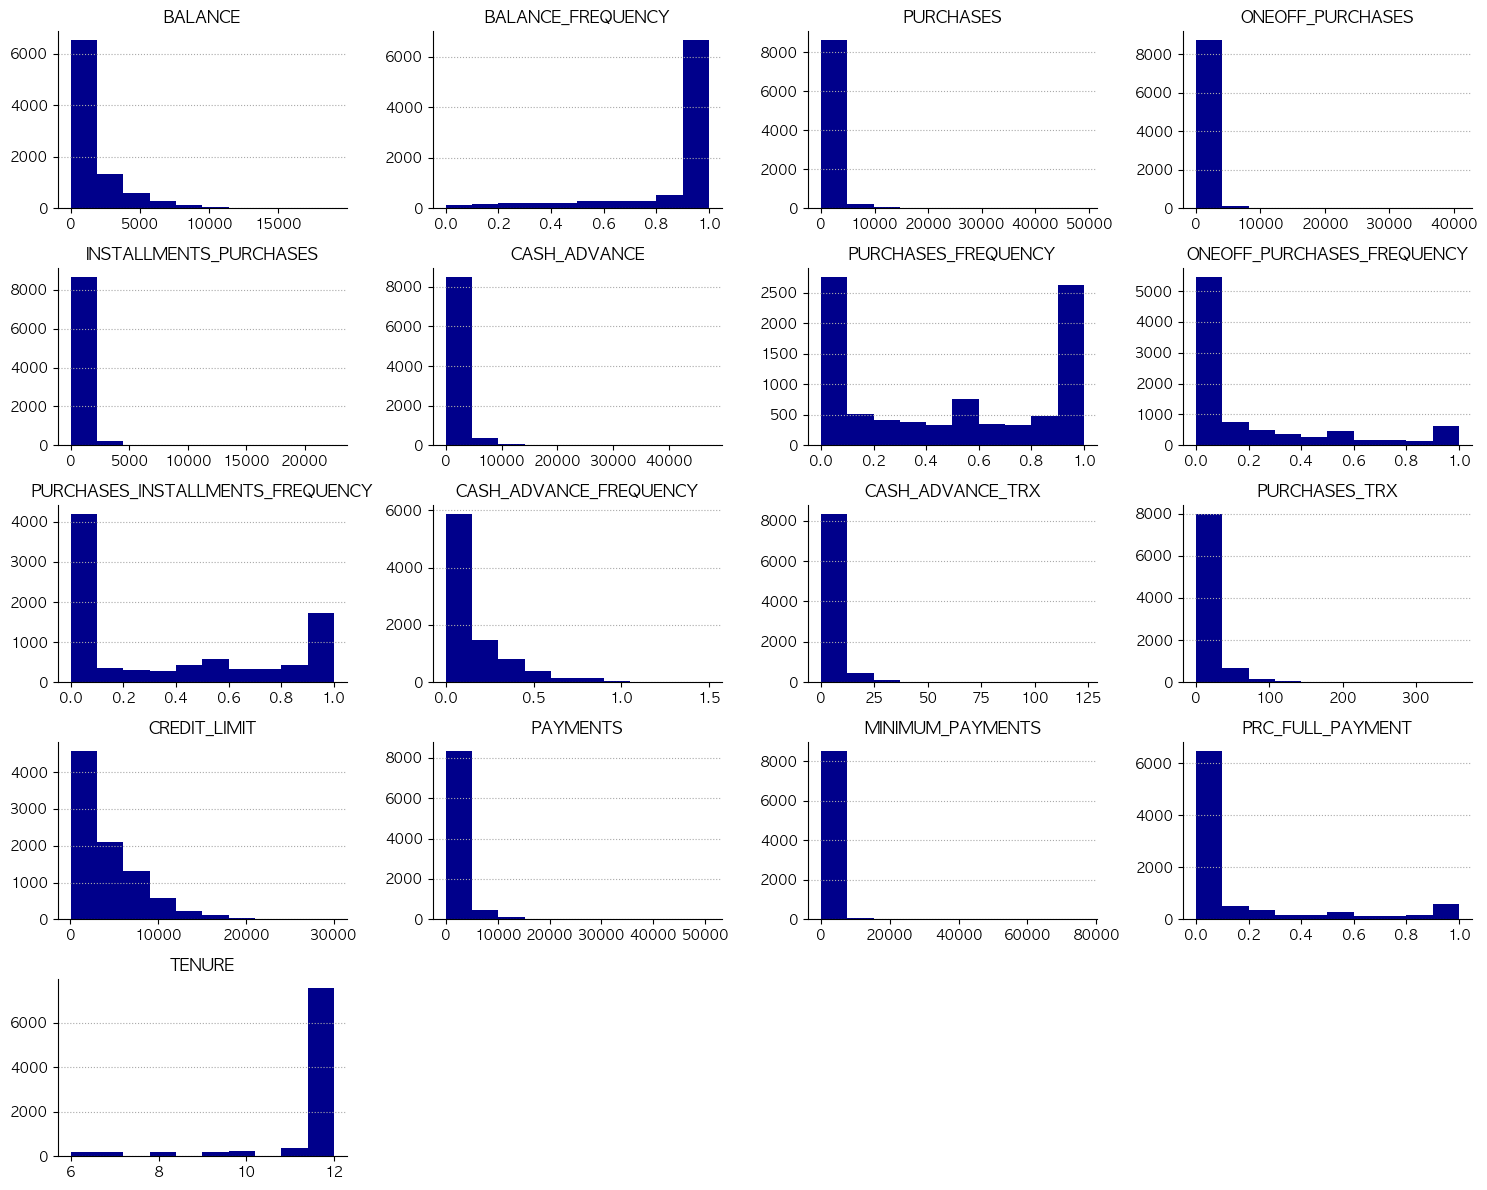

In [10]:
# 히스토그램 시각화
# 변수 선별
numeric_df = data.select_dtypes(include=['number'])
cols = numeric_df.columns

# 서브플롯 생성
fig, axes = plt.subplots(5, 4, figsize=(15, 12))
axes = axes.flatten()  

# 각 컬럼에 대해 히스토그램 그리기
for i, column in enumerate(cols):
    axes[i].hist(numeric_df[column].dropna(), color='darkblue', alpha=1)
    axes[i].set_title(column)
    axes[i].grid(axis='y', linestyle=':', color='darkgrey')
    axes[i].spines[['top','right']].set_visible(False)

# 빈 서브플롯 숨기기
for j in range(len(cols), len(axes)):
    axes[j].axis("off")

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

### 분석할 컬럼 선정

1.	총 구매액 (PURCHASES): 고객의 소비 수준

2.	구매 빈도 (PURCHASES_FREQUENCY): 소비 활성도와 주기성
3.  일회성 구매 빈도 (ONEOFF_PURCHASES_FREQUENCY) : 소비 성향 파악(단발성 고액 / 정기적 소액)
4.  현금 서비스 금액 (CASH_ADVANCE) : 재정적 필요와 신용 태도 파악
5.	지불액 (PAYMENTS): 결제 능력 확인
6.	전액 지불 비율 (PRC_FULL_PAYMENT): 청구 금액 중 전액 결제 비율로 재정 건전성 평가

---

## 2. 데이터 전처리

### 1) 중복값 처리

In [11]:
data.duplicated().sum()

np.int64(0)

- 중복값 존재하지 않음

### 2) 결측치 처리

In [12]:
# 결측치 비율 확인
(data.isna().sum()/len(data) * 100).round(2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

- 전체 데이터에서 결측치가 차지하는 비율이 약 3.5%로, 삭제해도 별다른 모수 데이터 왜곡이 발생하지 않을것으로 판단되어 결측치 데이터를 모두 삭제한다.

In [ ]:
# 결측치 삭제 : 8950 -> 8636
preprocessed_df = data.dropna()

# 결측치 삭제 확인
(preprocessed_df.isna().sum()/len(data) * 100).round(2)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [14]:
preprocessed_df.shape

(8636, 18)

### 3) 이상치 처리

- 전처리가 필요없는, 숫자형 변수가 아닌 ID값 'CUST_ID' 컬럼을 인덱스로 지정

In [15]:
preprocessed_df = preprocessed_df.set_index('CUST_ID')
preprocessed_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [16]:
preprocessed_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- 평균과 max와 min값의 차이가 크지 않거나, max와 min값 간의 차이가 매우 작으면 이상치 처리를 하지 않는다.

- max와 min값이 실제 존재 가능한 수치, 분석할 가치가 있다고 판단되면 이상치 처리를 하지 않는다. (거래 횟수, 현금 사용 횟수 같은 경우 스케일 단위가 크지 않고 VIP고객과 같은 특정 세그먼트로 분류될 가능성 존재)
    - 이상치 제거 대상 컬럼 : BALANCE, PURCHASES, ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES, CASH_ADVANCE, PAYMENTS, CREDIT_LIMIT, MINIMUM_PAYMENTS

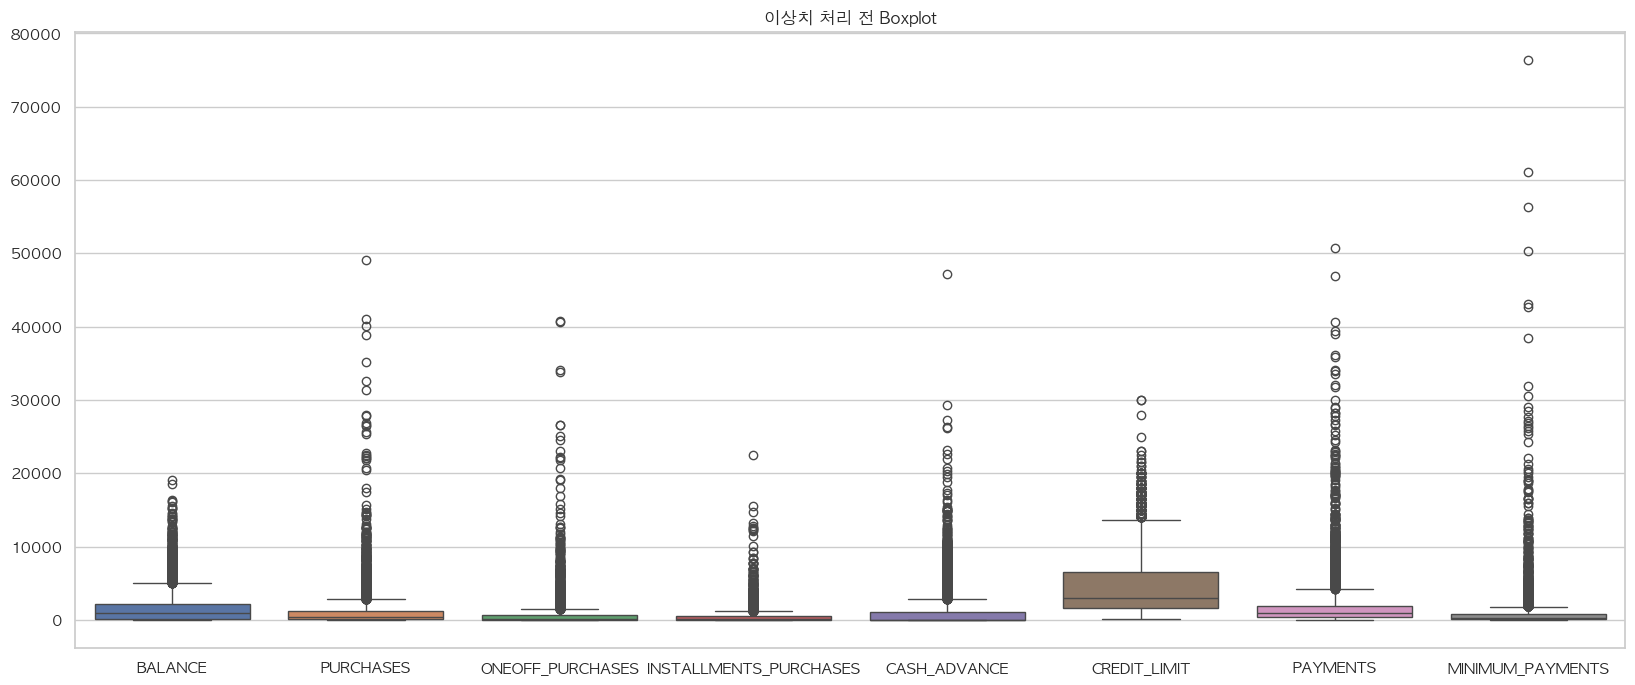

In [17]:
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
        'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']

sns.set_theme(style='whitegrid',rc = {'figure.figsize':(20,8)},font="AppleGothic")
sns.boxplot(data=preprocessed_df[cols])
plt.title('이상치 처리 전 Boxplot')
plt.show()

In [18]:
# 이상치 확인 함수 정의
def get_outlier_mask(df, weight=1.5):
    Q1 = df.quantile(0.25) # 백분위수 25%
    Q3 = df.quantile(0.75) # 백분위수 75%
    
    IQR = Q3 - Q1
    IQR_weight = IQR * weight
    
    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight
    
    outlier_per_column = (df < range_min) | (df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1) # 값들 중 어느 하나라도 이상치에 포함되면,
    
    return is_outlier

In [19]:
# 선별한 컬럼 이상치 개수 확인
outlier_df = get_outlier_mask(preprocessed_df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']])
outlier_df.value_counts()

False    5698
True     2938
Name: count, dtype: int64

In [20]:
# 이상치 제거
preprocessed_df = preprocessed_df[~outlier_df]

In [21]:
# 남은 데이터 수 확인
preprocessed_df.shape

(5698, 17)

In [22]:
# 데이터 프레임 확인
preprocessed_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12


### 4) 데이터 표준화
- 클러스터 분석을 위해 데이터 표준화 진행

In [26]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(preprocessed_df),columns=preprocessed_df.columns)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.826348,-0.229991,-0.692049,-0.608378,-0.389850,-0.596232,-0.729542,-0.596257,-0.653686,-0.63878,-0.514824,-0.615489,-0.904652,-0.838510,-0.668485,-0.53516,0.377418
1,1.572021,0.565184,0.742286,1.570552,-0.723483,-0.596232,1.425616,3.487560,-0.873165,-0.63878,-0.514824,0.284772,1.679484,-0.265518,0.747946,-0.53516,0.377418
2,-0.067221,0.565184,-0.860079,-0.563287,-0.723483,-0.596232,-0.945060,-0.255940,-0.873165,-0.63878,-0.514824,-0.705516,-0.825140,-0.188802,-0.362762,-0.53516,0.377418
3,0.915814,0.565184,0.029171,-0.608378,0.801995,-0.596232,1.425616,-0.596257,1.760588,-0.63878,-0.514824,0.284772,-0.387824,-0.187806,0.471351,-0.53516,0.377418
4,0.125501,0.565184,0.929194,1.255818,-0.024043,-0.596232,-0.298512,-0.255940,-0.214727,-0.63878,-0.514824,-0.345411,1.480705,-0.175245,-0.167703,-0.53516,0.377418


---

## 3. 데이터 분석

### 1) 주성분분석(PCA)
- 현재 컬럼이 17개로 클러스터링을 하기에 너무 차원이 높아 차원의 저주 이슈 발생이 예상된다.
- 따라서 주성분분석을 통해 저차원으로 낮춰 클러스터링을 진행한다.

In [27]:
pca = PCA(n_components=17)
pca_data = pd.DataFrame(pca.fit_transform(scaled_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6',
                                                               'PC7','PC8','PC9','PC10','PC11','PC12',
                                                               'PC13','PC14','PC15','PC16','PC17'])
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.843104,-2.102107,0.327830,0.634725,-0.443571,-0.871600,-0.081007,-0.148299,0.216943,0.242828,0.109402,0.238047,-0.144661,-0.165865,-0.061768,-0.067178,0.001044
1,1.526270,2.518810,2.931043,1.229565,-1.115255,1.246506,-1.119057,0.020750,-0.445242,-1.209350,-0.187510,-0.220048,-1.105008,0.472984,-0.345458,-0.378458,-0.000017
2,-1.259073,-1.270130,0.586393,1.082290,-0.466673,-0.717977,-0.019421,0.616382,0.602098,0.061377,-0.080033,0.367840,-0.092598,0.050225,-0.282969,0.047785,0.000125
3,1.380382,0.169009,-1.854475,1.694492,-0.186024,-0.100718,0.379615,-0.234583,0.068586,-0.417449,-0.201136,-0.701863,-0.072006,0.533554,-0.340676,-0.003810,0.000515
4,0.696806,0.418431,1.415230,0.912730,0.218960,0.501395,-0.210873,-0.592659,0.868123,1.171572,0.036702,-0.564351,0.366751,-0.178400,-0.016793,-0.026614,-0.000029


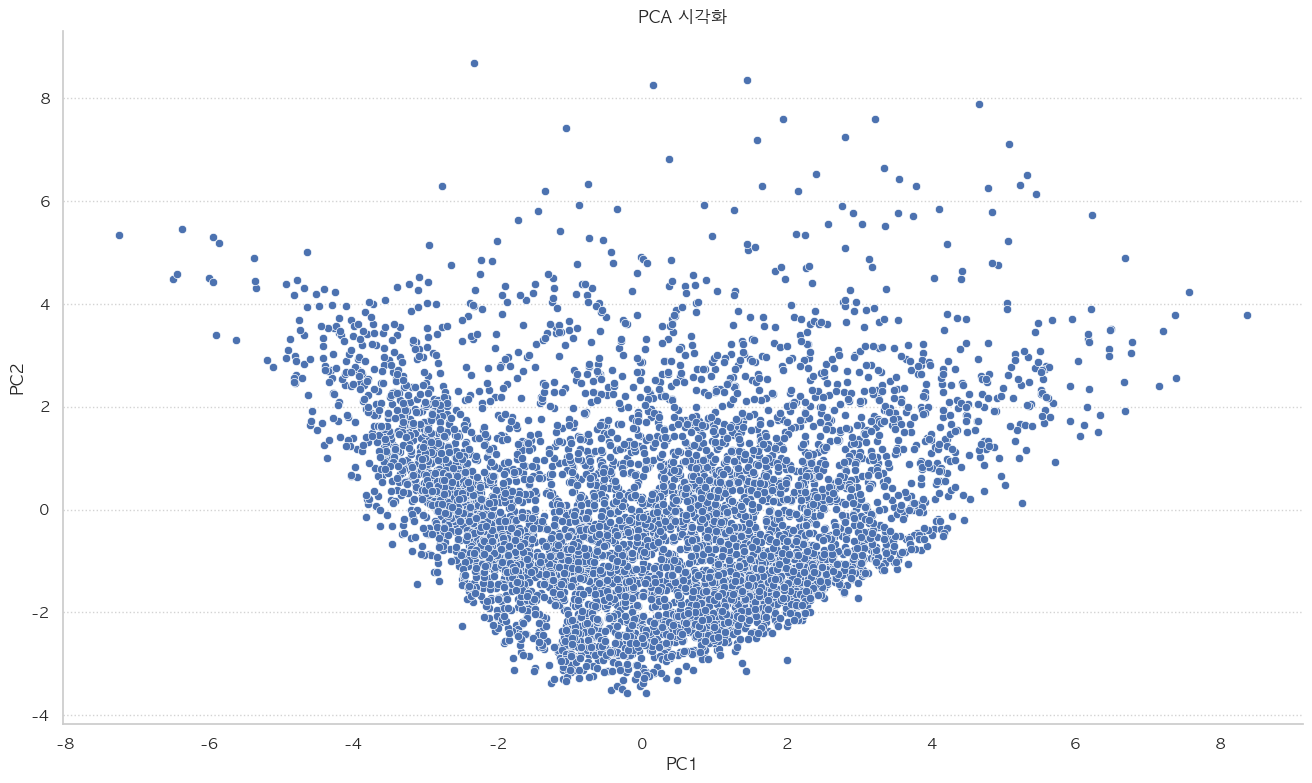

In [50]:
# 2차원 시각화
fig, ax = plt.subplots(figsize=(16,9))

sns.scatterplot(data=pca_data, x=pca_data['PC1'],y=pca_data['PC2'],ax=ax)

sns.despine()

ax.set_title('PCA 시각화')
ax.set_ylabel('PC1')
ax.set_ylabel('PC2')
ax.grid(False)
ax.grid(axis='y', linestyle=':', color='lightgrey')

fig.show()

#### 주성분 수 결정
- 분산 설명 비율 활용하여 `70%` 이상 설명하는 주성분 개수로 결정

In [51]:
# 분산 설명 비율
vars = pca.explained_variance_ratio_
vars

array([2.83789818e-01, 1.87934953e-01, 1.09851077e-01, 8.84032141e-02,
       6.88380944e-02, 5.08222149e-02, 4.45022405e-02, 3.86178040e-02,
       3.30954383e-02, 2.71973696e-02, 1.99440406e-02, 1.57985013e-02,
       1.35261397e-02, 8.90506655e-03, 7.04518156e-03, 1.71732622e-03,
       1.15200058e-05])

In [52]:
# 시각화를 위한 누적 분산 설명 비율 데이터 프레임 생성 
cum_var = np.cumsum(vars)
cum_var_df = pd.DataFrame({'cum_vars':cum_var}, index=pca_data.columns)
cum_var_df

,cum_vars
PC1,0.283790
PC2,0.471725
PC3,0.581576
PC4,0.669979
PC5,0.738817
PC6,0.789639
PC7,0.834142
PC8,0.872759
PC9,0.905855
PC10,0.933052


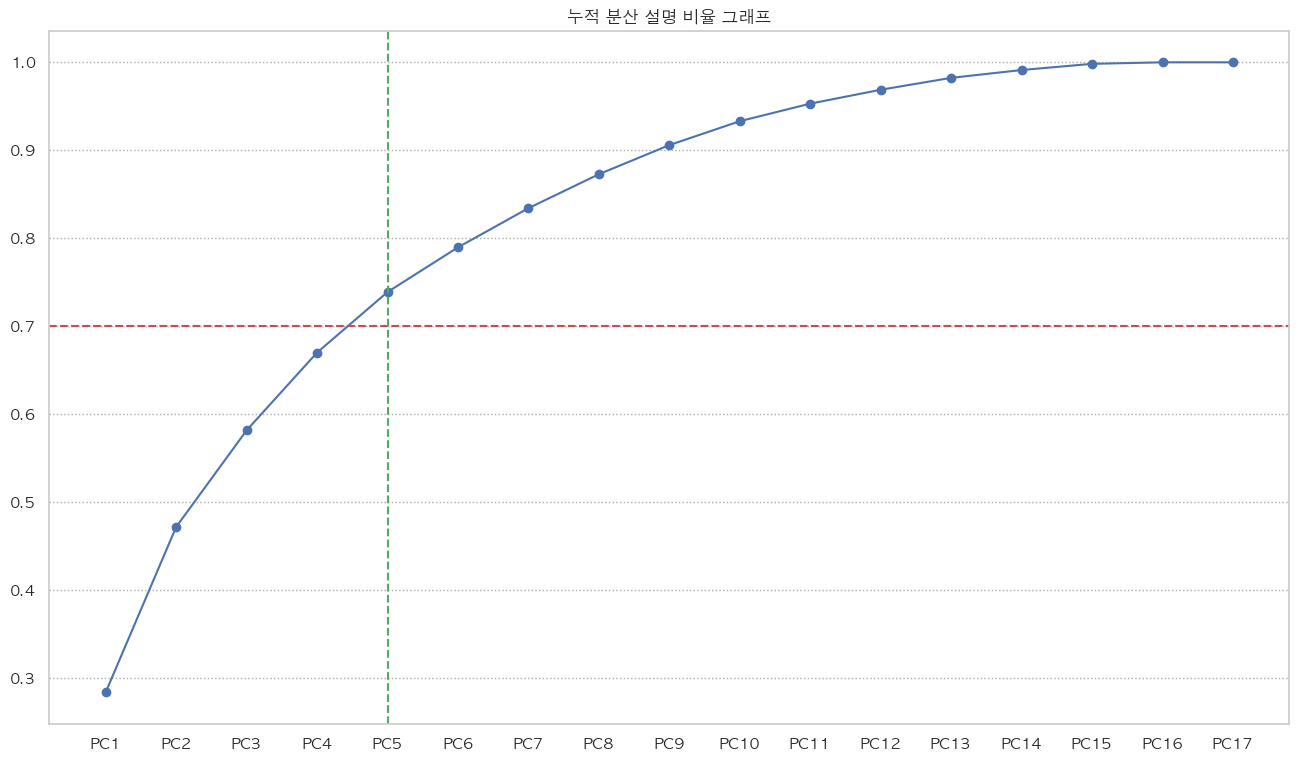

In [60]:
# 누적 분산 설명 비율 그래프 시각화
plt.figure(figsize=(16,9))
plt.plot(cum_var_df.index, cum_var_df['cum_vars'],marker='o',label='누적 분산 설명 비율')
plt.axhline(y=0.7,color='r',linestyle='--',label='70% 지점')
threshold_index = np.argmax(cum_var >= 0.7)
plt.axvline(x=threshold_index,color='g',linestyle='--',label=f"PC{threshold_index+1}")
plt.title("누적 분산 설명 비율 그래프")
plt.grid(False)
plt.grid(axis='y', linestyle=':', color='darkgrey')
plt.show()

따라서, 주성분 개수를 5개로 설정하기로 한다.

#### 주성분으로 데이터 변환

In [61]:
# 5개의 주성분으로 데이터 변환
pca = PCA(n_components=5)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=['PC1','PC2','PC3', 'PC4', 'PC5'])
pca_df

,PC1,PC2,PC3,PC4,PC5
0,-0.843104,-2.102107,0.327830,0.634725,-0.443571
1,1.526270,2.518810,2.931043,1.229565,-1.115255
2,-1.259073,-1.270130,0.586393,1.082290,-0.466673
3,1.380382,0.169009,-1.854475,1.694492,-0.186024
4,0.696806,0.418431,1.415230,0.912730,0.218960
...,...,...,...,...,...
5693,-1.127168,-2.940286,0.627770,-1.540433,-2.459009
5694,1.370036,-2.112327,-1.967504,-1.437357,-2.208178
5695,0.545250,-2.419635,-1.363253,-1.245829,-2.439541
5696,-1.728491,-2.465409,-0.239305,-1.810291,-2.431958


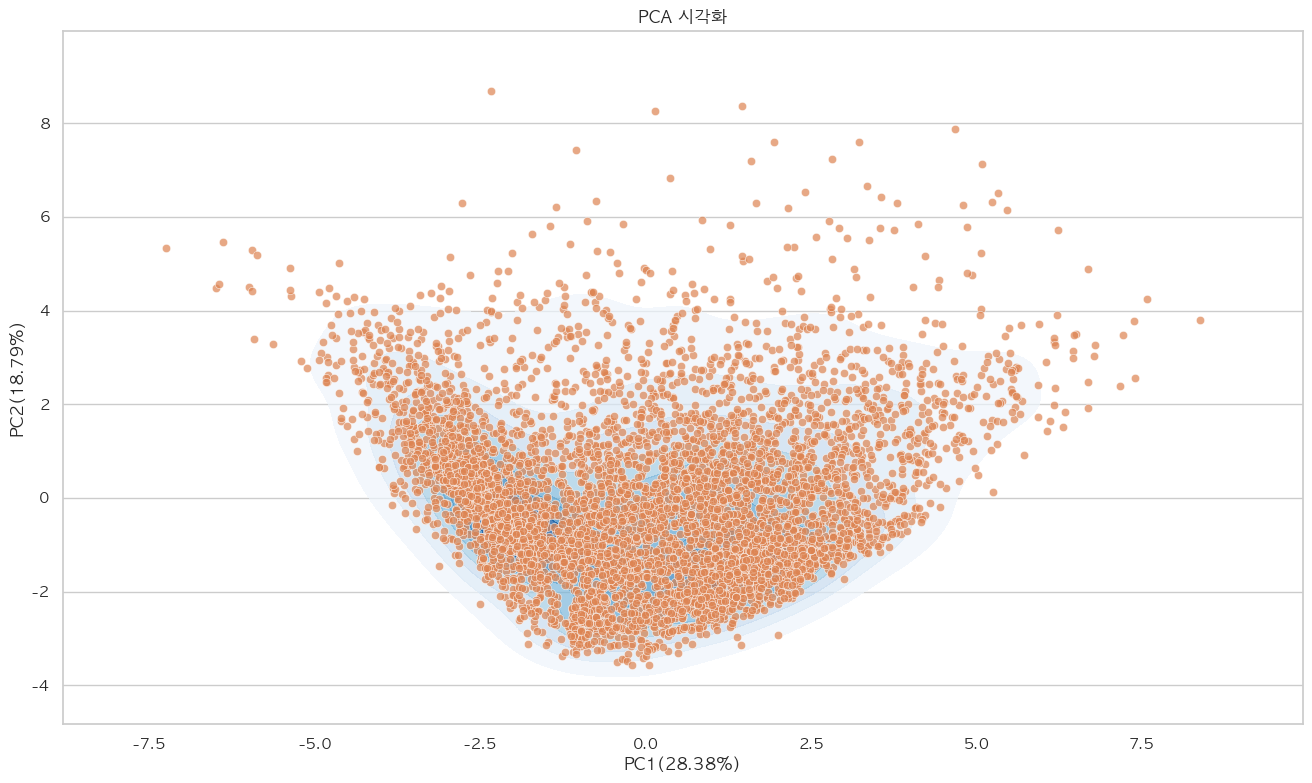

In [68]:
# 2차원 시각화
fig, ax = plt.subplots(figsize=(16,9))
sns.kdeplot(x=pca_df['PC1'],y=pca_df['PC2'], fill=True, cmap='Blues', alpha=.7)
sns.scatterplot(data=pca_df, x=pca_df['PC1'],y=pca_df['PC2'], alpha=.7)

ax.set_title('')
ax.set_title('PCA 시각화')
ax.set_xlabel(f'PC1({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(axis='x')

fig.show()

### 2) 클러스터 분석(Kmeans)

#### elbow-method
- 최적의 클러스터 수를 구하기 위해 elbow-method 그래프 활용

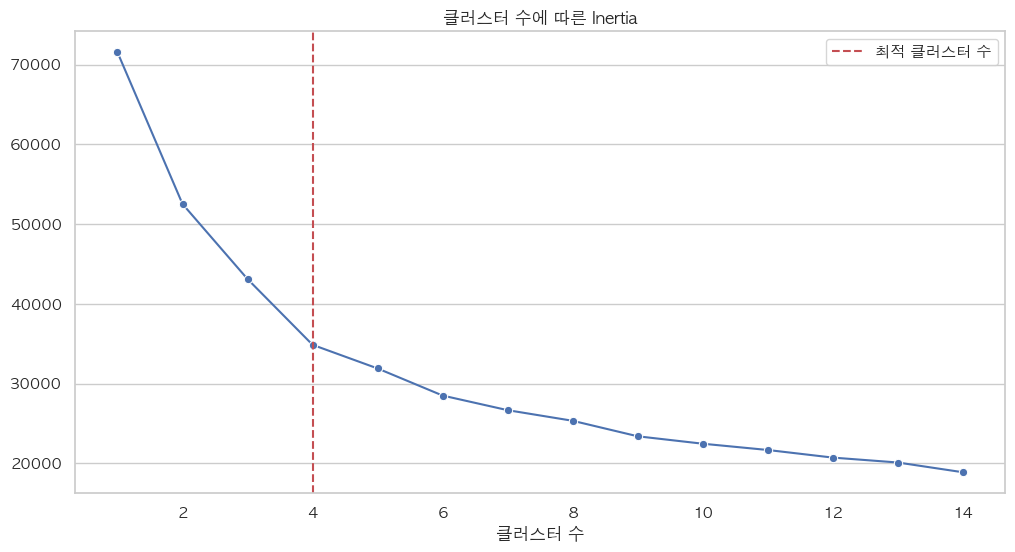

In [69]:
# elbow-method 시각화
inertias = []
for k in range(1,15):
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(pca_df)
    inertias.append(model.inertia_)
sns.set_theme(style='whitegrid',rc={'figure.figsize':(12,6)},font='AppleGothic',font_scale=1)
sns.lineplot(x=range(1,15), y=inertias, marker='o')
plt.axvline(x=4,linestyle='--',color='r',label='최적 클러스터 수')
plt.title('클러스터 수에 따른 Inertia')
plt.xlabel('클러스터 수')
plt.grid(axis='x')
plt.legend()
plt.show()

- 기울기가 가파르게 감소하다가 완만해지는 지점인 `4개`로 클러스터 개수 설정

#### K-means 모델 활용
- 클러스터 수 `4개`로 설정

In [70]:
# K-means 모델 생성 및 학습
model = KMeans(n_clusters=4,random_state=123,init='k-means++')
model.fit(pca_df)
pca_df['label'] = model.labels_
pca_df.head(3)

,PC1,PC2,PC3,PC4,PC5,label
0,-0.843104,-2.102107,0.327830,0.634725,-0.443571,2
1,1.526270,2.518810,2.931043,1.229565,-1.115255,3
2,-1.259073,-1.270130,0.586393,1.082290,-0.466673,2


In [71]:
# 클러스터별 개수 확인
pca_df['label'].value_counts().sort_index()

label
0    1185
1    1532
2    2061
3     920
Name: count, dtype: int64

In [72]:
# 클러스터별로 그룹핑
pca_df.groupby('label').mean()

,PC1,PC2,PC3,PC4,PC5
label,,,,,
0,-2.643087,1.527251,-0.538787,-0.386801,0.230860
1,1.770167,-0.701365,-1.353343,0.179500,0.077330
2,-0.897200,-1.190245,0.644479,0.227718,-0.021910
3,2.466621,1.867167,1.503818,-0.310827,-0.377046


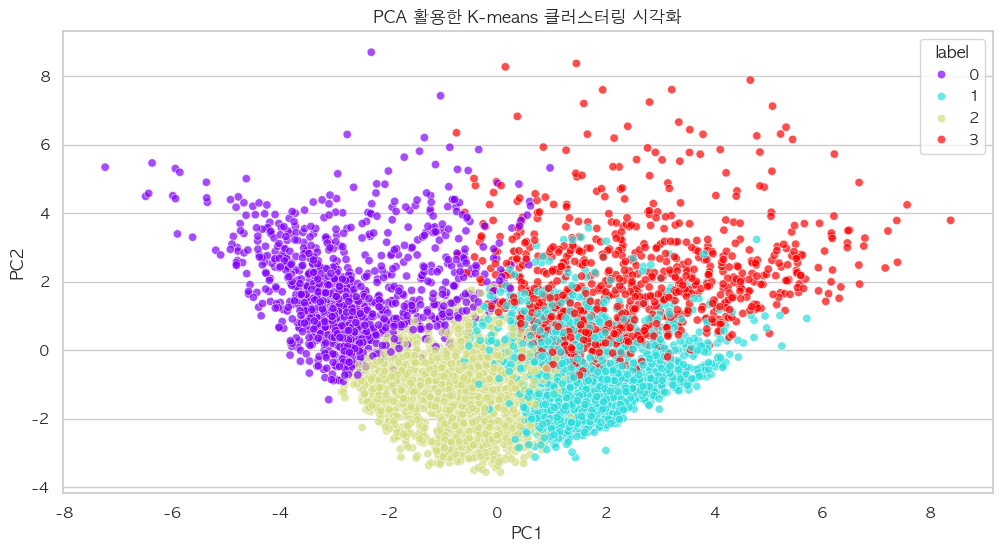

In [73]:
# 클러스터링 결과 시각화
sns.scatterplot(data=pca_df, x=pca_df['PC1'],y=pca_df['PC2'], hue='label', alpha=0.7, palette='rainbow')
plt.grid(axis='x')
plt.title('PCA 활용한 K-means 클러스터링 시각화')
plt.show()

In [74]:
# 실루엣 계수 계산
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(pca_df, pca_df['label'])
print("실루엣 계수:", silhouette)

실루엣 계수: 0.3105985119667779


#### 결과

In [75]:
# 표준화전 데이터에 label(cluster 번호) 삽입
preprocessed_df['cluster']=model.labels_
preprocessed_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12,2
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12,3
C10005,817.714335,1.000000,16.00,16.00,0.0,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12,2
C10008,1823.652743,1.000000,436.20,0.00,436.2,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.0,12,1
C10009,1014.926473,1.000000,861.49,661.49,200.0,0.0,0.333333,0.083333,0.250000,0.0,0,5,7000.0,688.278568,311.963409,0.0,12,2


In [76]:
# 클러스터별 고객 수 확인
preprocessed_df.groupby('cluster').count().iloc[:,0]

cluster
0    1185
1    1532
2    2061
3     920
Name: BALANCE, dtype: int64

In [77]:
# 클러스터별 평균 값 확인
preprocessed_df.groupby('cluster').mean().T

cluster,0,1,2,3
BALANCE,1913.567858,399.211494,598.951138,1019.212625
BALANCE_FREQUENCY,0.959401,0.905456,0.762841,0.940632
PURCHASES,138.071544,524.880548,173.205502,1176.321391
ONEOFF_PURCHASES,88.197857,53.693505,122.385623,859.841652
INSTALLMENTS_PURCHASES,49.873688,472.114315,51.059267,316.479739
CASH_ADVANCE,1359.421232,83.292709,200.054071,182.746227
PURCHASES_FREQUENCY,0.151337,0.854905,0.179193,0.759412
ONEOFF_PURCHASES_FREQUENCY,0.064203,0.045030,0.078741,0.570199
PURCHASES_INSTALLMENTS_FREQUENCY,0.088952,0.802283,0.094610,0.390818
CASH_ADVANCE_FREQUENCY,0.329149,0.023625,0.057530,0.051817


## 4. 결론

### 1) 분석할 컬럼 선정

1.	총 구매액 (PURCHASES): 고객의 소비 수준

2.	구매 빈도 (PURCHASES_FREQUENCY): 소비 활성도와 주기성
3.  일회성 구매 빈도 (ONEOFF_PURCHASES_FREQUENCY) : 소비 성향 파악(단발성 고액 / 정기적 소액)
4.  현금 서비스 금액 (CASH_ADVANCE) : 재정적 필요와 신용 태도 파악
5.	지불액 (PAYMENTS): 결제 능력 확인
6.	전액 지불 비율 (PRC_FULL_PAYMENT): 청구 금액 중 전액 결제 비율로 재정 건전성 평가

In [79]:
# 선정한 컬럼들의 값 확인
preprocessed_df.groupby('cluster')[['PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'PAYMENTS', 'PRC_FULL_PAYMENT']].mean().T

cluster,0,1,2,3
PURCHASES,138.071544,524.880548,173.205502,1176.321391
PURCHASES_FREQUENCY,0.151337,0.854905,0.179193,0.759412
ONEOFF_PURCHASES_FREQUENCY,0.064203,0.045030,0.078741,0.570199
CASH_ADVANCE,1359.421232,83.292709,200.054071,182.746227
PAYMENTS,1102.021501,640.388459,577.015464,1280.435360
PRC_FULL_PAYMENT,0.023425,0.309510,0.104897,0.184935


### 2) 고객 세그멘테이션

#### 활성도가 낮은 고객
- 클러스터 0 : 재정 위험 고객
    - 총 구매액 가장 낮음
    - 구매 빈도 가장 낮음
    - `지불액 높음`
    - 전액 지불 비율 가장 낮음
    - `현금 서비스 금액 가장 높음`

- 클러스터 2 : 미활성 고객(저소비/비주기적)
    - 총 구매액 낮음
    - 구매 빈도 낮음
    - 지불액 낮음
    - 전액 지불 비율 낮음


#### 활성도가 높은 고객
- 클러스터 1 : 고활성 고객(고소비/주기적)
    - 총 구매액 높음
    - `구매 빈도 가장 높음`
    - 지불액 낮음
    - `전액 지불 비율 가장 높음`
    - `현금 서비스 금액 가장 낮음`
    - `일회성 구매 빈도 가장 낮음`

- 클러스터 3 : 프리미엄 고객(고소비/주기적)
    - `총 구매액 가장 높음(압도적)`
    - 구매 빈도 높음
    - `일회성 구매 빈도 가장 높음(압도적)`
    - `지불액 가장 높음`
    - 전액 지불 비율 높음

### 3) 세그먼트별 맞춤 마케팅 전략 제안

> #### 클러스터 0 : 재정 위험 고객
**[ 특성 ]**
- 소비 수준 낮음: 총 구매액과 구매 빈도가 매우 낮음
- 지불액은 상대적으로 높음: 결제는 있지만 소비 수준은 낮아 카드 사용 빈도가 적고, 소비성향이 낮을 가능성 있음
- 전액 지불 비율 가장 낮음: 대체로 최소 결제만 하며, 할부나 이자 부과를 선호할 수 있음
- 현금 서비스 금액 가장 높음: 소액 대출 금액이 가장 높으므로, 현금이 부족한 재정난에 처해 있을 가능성 높음
	- 추가적으로 현금 서비스 빈도(CASH_ADVANCE_TRX를 확인했을 때, 다른 클러스터에 비해 압도적으로 가장 높았음)

**[ 분석 인사이트 ]**

재정 위험 고객은 과도한 부채를 지고 있거나 상환 능력이 떨어져 신용 위험을 유발할 수 있는 가능성이 큰 고객들이다. 따라서 해당 고객군은 무엇보다 먼저 금융 상태를 개선하는 것에 초점을 맞춘 마케팅 전략이 요구된다. 	

**[ 맞춤형 마케팅 전략 ]**
- 저금리 대출 상품 제공: 이자율이 일반적으로 매우 높은 현금 서비스 대신 저금리 대출 상품을 제공하여 긴급 자금을 필요로 하는 고객에게 더 나은 조건의 대출을 제안
- 부분 금리 인하 및 유예 서비스: 고객의 재정 상황을 고려하여 금리를 인하하거나 일정 기간 동안 결제 유예 서비스를 제공. 이를 통해 고객이 연체 없이 결제를 할 수 있도록 유도
- 생필품 제휴 프로모션: 재정이 부족하기 때문에 필수적인 소비만 이루어질 가능성이 높으므로, 생필품을 판매하는 브랜드와 제휴하여 자사 카드로 결제 시 할인이 적용되는 공동 프로모션을 실행

> #### 클러스터 1 : 고활성 고객
**[ 특성 ]**
- 소비 활성 수준 높음: 총 구매액과 구매 빈도가 매우 높음
- 지불액 낮음: 카드 사용이 활발하지만 전액 지불은 적음
- 전액 지불 비율 높음: 전액 지불 비율은 높은데 전체 결제 금액에 비해 지불액이 적어서 할부 결제를 많이 이용하는 것으로 추정됨
	- 추가로 할부 결제 빈도(PURCHASES_INSTALLMENTS_FREQUENCY) 확인해보니 다른 고객군에 비해 압도적으로 높음
- 현금 서비스 금액 낮음: 재정 관리가 비교적 안정적이고 현금 서비스보다는 카드 결제에 집중하는 고객
- 일회성 구매 빈도 낮음: 주기적인 소비 패턴을 보이며 일회성 구매보다는 지속적인 소비 성향을 가짐

**[ 분석 인사이트 ]**

고활성 고객은 자사의 중요한 수익원이며, 이들을 잘 관리해 충성도 높은 고객으로 만드는 것을 제1의 목표로 설정해야 한다. 고활성 고객은 일회성 구매보다 지속적인 소비를 많이하고 재정이 안정적이면서 할부 결제를 자주 이용하는 경향이 두드러지기 때문에 실용적이고 생활에 밀접한 소비를 많이 하는 것으로 추정된다. 따라서 생활 밀착형 혜택을 제공함으로써 고활성 고객의 만족도를 높이고 지속적인 사용을 유도하는 방향의 마케팅을 진행해야 한다.

**[ 맞춤형 마케팅 전략 ]**
- 포인트 적립/캐시백 이벤트: 소비 수준이 높고 정기적으로 꾸준히 카드를 이용하는 고객이므로 로열티를 강화시키기 위해 <일정 구매액 이상 + 일정 구매 횟수 이상> 달성 시 추가 포인트를 적립해주고, 캐시백 비율을 증가시킨다.
- 무이자 혜택 확장: 해당 고객군의 구매 빈도가 높은 상품 선별 후 무이자 혜택을 제공하여 정기적인 소비를 유지하도록 유도

> #### 클러스터 2 : 미활성 고객
**[ 특성 ]**
- 소비 활성 수준 매우 낮음: 총 구매액, 구매 빈도, 지불액 모두 낮음
- 전액 지불 비율 낮음: 카드 사용을 거의 하지 않는 것으로 보임

**[ 분석 인사이트 ]**

미활성 고객은 신용카드를 사용하는 빈도가 낮거나 장기간 사용하지 않는 고객을 의미하며, 카드 사용을 자주 하지 않거나 일상적인 소비에서 카드를 사용하지 않는 경향이 있다. 하지만 미활성 고객은 잠재적인 카드 사용자가 될 수 있으므로 해당 고객들을 우선 카드 사용으로 유입시키는 전략이 필요하다. 따라서 인지와 유입에 맞춘 이벤트와 혜택 기획과 마케팅 전략이 요구된다.

**[ 맞춤형 마케팅 전략 ]**
- CRM 마케팅 : 이메일, SMS, 카카오톡 등으로 신용카드의 혜택을 알리면서 신용카드의 존재를 정기적으로 인지시킨다.
- 온보딩 이벤트 : 결제 목표 단계를 설정하여 달성하면 목표 단계별 추가 혜택(포인트 두배 적립, 캐시백 두배, 특정 제휴사와 공동 할인 프로모션 등)을 제공해 카드 사용에 관심을 갖게 하며, 신용 카드 사용의 여러 소구점(제휴사 소개, 포인트 제도, 고객 등급제 등)을 자연스럽게 홍보한다.

> #### 클러스터 3 : 프리미엄 고객
**[ 특성 ]**
- 소비 수준 매우 높음: 총 구매액이 압도적으로 높음
- 구매 빈도 높음: 자주 구매하는 경향이 있음
- 일회성 구매 빈도 높음: 한 번에 많은 금액을 지출하며, 특별한 행사나 한정판 상품 등에 적극 반응할 가능성 있음
- 지불액 높음: 카드 사용 금액이 크고, 결제 성향이 적극적임
- 전액 지불 비율 높음: 결제 시 전액을 지불하는 경향이 있음

**[ 분석 인사이트 ]**

VIP 고객에게는 특별한 경험과 대우를 제공하는 것이 중요하다. 자사의 중요한 고객이라는 인식을 심어줘 고객의 충성도를 더욱 강화하고, 카드사의 프리미엄 이미지를 더욱 부각시킬 수 있다. VIP 고객은 대부분 소득 수준이 높을 가능성이 크기 때문에 해당 고객들이 자주 사용하는 서비스와 연계하여(프리미엄 라이프스타일) 맞춤형 혜택을 제공하는 것이 효과적일 것이다.

**[ 맞춤형 마케팅 전략 ]**
- VIP 전용 이벤트 : 력셔리 여행 패키지(고급 호텔, 비즈니스 클래스 항공권, 교통수단 VIP 전용 라운지 출입 등) 혜택이나 VIP 전용 콘서트/행사 초대권 지급 등으로 VIP고객의 로열티를 강화한다.
- 커스텀 신용카드 발급 : 신용카드 디자인을 커스텀할 수 있는 혜택을 제공해서 특별한 고객이라고 확실하게 인식시킨다.
- 맞춤 금융 컨설팅 제공 : 파이낸스 컨설팅 회사와 제휴를 맺고 VIP 멤버에게 금융 컨설팅을 제공한다.